In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_vac_src=pd.read_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/8a89caa9-511c-4568-af89-7f2174b4378c/download/vaccine_doses.csv')

In [3]:
df_cases_src=pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')

In [4]:
df_cases=df_cases_src[['Date', 'Total']]
df_cases.columns=['Date', 'New Cases']                 

In [5]:
df_vac=df_vac_src[['report_date', 'total_individuals_fully_vaccinated']]
df_vac.columns=['Date', 'Fully Vaccinated Total']

In [6]:
df_plot=pd.merge(df_vac, df_cases, on='Date')
df_plot['Fully Vaccinated Total']=df_plot['Fully Vaccinated Total'].str.replace(',', '')
df_plot.fillna(0, inplace=True)
df_plot['Fully Vaccinated Total']=df_plot['Fully Vaccinated Total'].astype(int)
df_plot.drop(df_plot[df_plot['Fully Vaccinated Total']==0].index, inplace=True)
df_plot['Date']=pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)

Text(0.5, 1.0, 'Vaccinations vs. New cases')

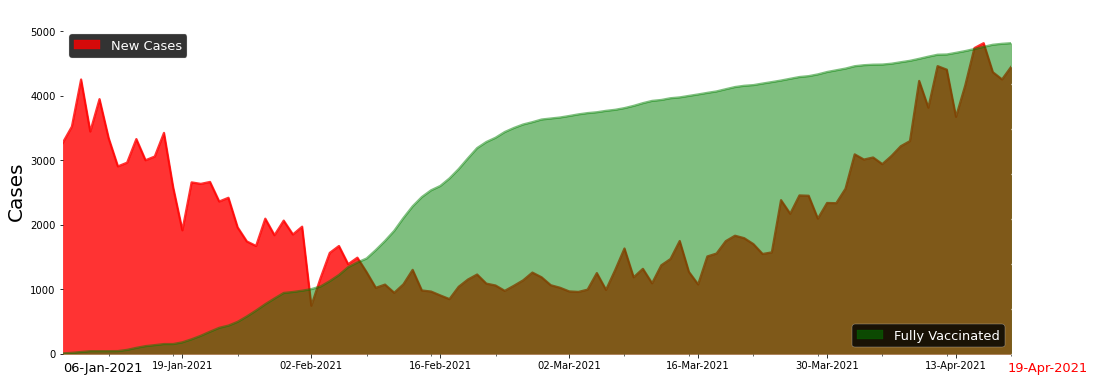

In [7]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax1 = plt.subplots(1, 1, figsize=(17,6))
plt.style.use(['dark_background'])
ax2=ax1.twinx()
df_plot.plot(ax=ax1, kind='area', alpha=0.8, y='New Cases', color='red', label='New Cases')
df_plot.plot(ax=ax2, kind='area', alpha=0.5, y='Fully Vaccinated Total', color='green', label='Fully Vaccinated')
ax1.set_xlabel('')
ax1.set_ylabel('Cases', fontsize=20)
ax2.set_ylabel('Vaccinations', fontsize=20)
ax1.legend(loc=0)
ax2.legend(loc=4)
ax1.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.xaxis.set_major_formatter(DateFormatter("%d-%b-%Y"))
ax1.annotate(str(df_plot.index.min().strftime('%d-%b-%Y')), xy=(0, -18), xycoords='axes points', color='black', fontsize=13)
ax1.annotate(str(df_plot.index.max().strftime('%d-%b-%Y')), xy=(945, -18), xycoords='axes points', color='red', fontsize=13)
plt.title('Vaccinations vs. New cases', fontsize=20)

In [8]:
fig.savefig('./img/vaccases')

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']